In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
putins_talks = pd.read_csv("data/putins_talks_prepared.csv")
dates_tags = pd.read_csv("data/dates_tags.csv")

In [29]:
putins_talks

,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist,grouped_tages
0,2012-05-07 12:20:00,[],The ceremony opened with the Russian State Fla...,15224.0,"The Kremlin, Moscow",Vladimir Putin inaugurated as President of Russia,The inauguration ceremony took place in the Gr...,[],"Citizens of Russia, friends, The inauguration ...","['citizen', 'of', 'Russia', ',', 'friend', ','...",[]
1,2012-05-08 16:00:00,[],State Duma deputies approved Dmitry Medvedev a...,15266.0,Moscow,State Duma plenary session,Vladimir Putin presented the candidacy of Dmit...,['Civil service'],"Mr Naryshkin, deputies of the Russian parliame...","['Mr', 'Naryshkin', ',', 'deputy', 'of', 'the'...",['State_Governance_Public_Service']
2,2012-05-09 11:00:00,[],"More than 14,000 military servicemen took part...",15271.0,Moscow,Military parade celebrating the 67th anniversa...,Vladimir Putin attended the military parade on...,['Armed Forces'],Citizens of Russia! Veterans! Comrade soldiers...,"['citizen', 'of', 'Russia', '!', 'veteran', '!...",['Security_Defense_Enforcement']
3,2012-05-09 13:00:00,[],* * * President of Russia Vladimir Putin: Vete...,15272.0,NaN,Reception marking the 67th anniversary of vict...,A reception marking the 67th anniversary of vi...,[],"Veterans, colleagues, friends! We all share th...","['veteran', ',', 'colleague', ',', 'friend', '...",[]
4,2012-05-10 14:00:00,[],Vladimir Putin thanked the members of the plan...,15282.0,Nizhny Tagil,Visit to Research and Production Corporation U...,"In Nizhny Tagil, Vladimir Putin visited Uralva...",['Regions'],"Good afternoon, I want to thank all of you for...","['good', 'afternoon', ',', 'I', 'want', 'to', ...",['State_Governance_Public_Service']
...,...,...,...,...,...,...,...,...,...,...,...
5074,2023-01-10 13:45:00,[],President of Russia Vladimir Putin: Mr Shaskol...,70336.0,"The Kremlin, Moscow",Meeting with Federal Anti-Monopoly Service Hea...,Vladimir Putin had a working meeting with Head...,['Economy and finance'],"Mr Shaskolsky, the Federal Anti-Monopoly Servi...","['Mr', 'Shaskolsky', ',', 'the', 'Federal', 'A...",['Macroeconomics_Fiscal_Policy']
5075,2023-01-11 15:50:00,[],The meeting was attended by Prime Minister Mik...,70338.0,"Novo-Ogaryovo, Moscow Region",Meeting with Government members,The President held a videoconference meeting w...,"['Construction industry', 'Economy and finance...","Good afternoon, colleagues, We are holding the...","['good', 'afternoon', ',', 'colleague', ',', '...","['Infrastructure_Housing_Construction', 'Macro..."
5076,2023-01-12 00:00:00,[],President of Russia Vladimir Putin: Comrade of...,70341.0,NaN,Congratulations on Prosecutor's Office Workers...,The President congratulated current staff and ...,['Fight against crime'],"Comrade officers, veterans, Congratulations on...","['comrade', 'officer', ',', 'veteran', ',', 'c...",['Security_Defense_Enforcement']
5077,2023-01-13 12:55:00,[],President of Russia Vladimir Putin: Mr Khabiro...,70347.0,Ufa,Meeting with Head of Bashkortostan Radiy Khabirov,The President had a meeting with Head of the R...,['Regions'],"Mr Khabirov, good afternoon. Let me start by s...","['Mr', 'Khabirov', ',', 'good', 'afternoon', '...",['State_Governance_Public_Service']


In [30]:
dates_tags

,date,tags
0,2012-05-08 16:00:00,State_Governance_Public_Service
1,2012-05-09 11:00:00,Security_Defense_Enforcement
2,2012-05-10 14:00:00,State_Governance_Public_Service
3,2012-05-11 13:00:00,Sport_Tourism_Media
4,2012-05-11 16:00:00,International_Relations_Global_Organizations
...,...,...
6292,2023-01-11 15:50:00,Social_Welfare_Health
6293,2023-01-12 00:00:00,Security_Defense_Enforcement
6294,2023-01-13 12:55:00,State_Governance_Public_Service
6295,2023-01-13 14:35:00,Sport_Tourism_Media


In [6]:
#histogram of speech lengths
putins_talks['length'] = putins_talks['transcript_filtered'].apply(lambda x: len(str(x).split()))

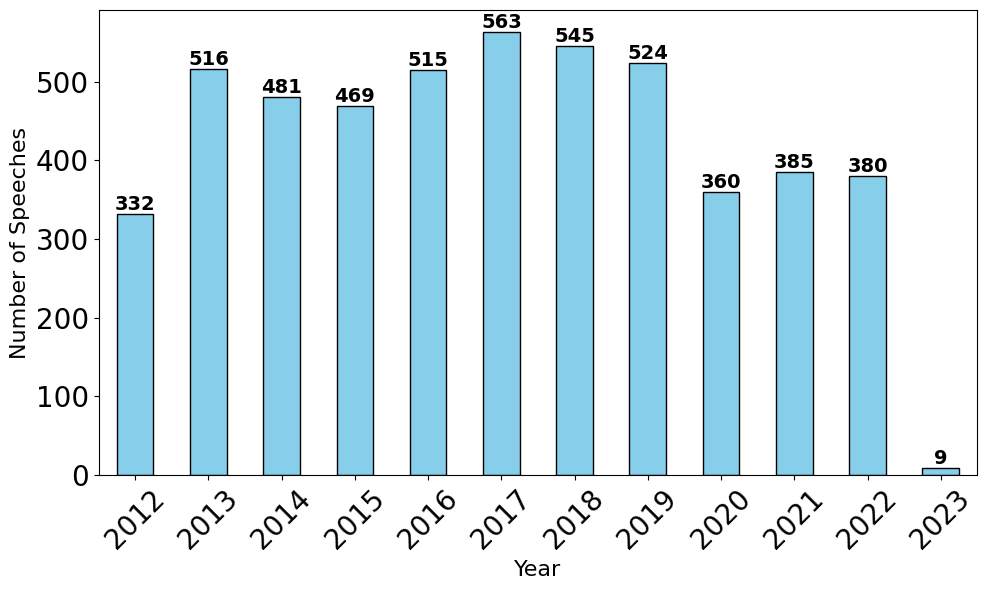

In [10]:
# Calculate number of speeches per year
yearly_counts = pd.to_datetime(putins_talks['date']).dt.year.value_counts().sort_index()
#from 2012
yearly_counts = yearly_counts[yearly_counts.index >= 2012]

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# plt.title("Number of Putin's Speeches per Year", fontsize=18) # Title will be in fig caption
plt.xlabel("Year", fontsize=16)
plt.xticks(fontsize=20)
plt.ylabel("Number of Speeches", fontsize=16)
plt.yticks(fontsize=20)
plt.xticks(rotation=45)

# Add values on top of bars
for i, v in enumerate(yearly_counts):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

### length of speeches analysis

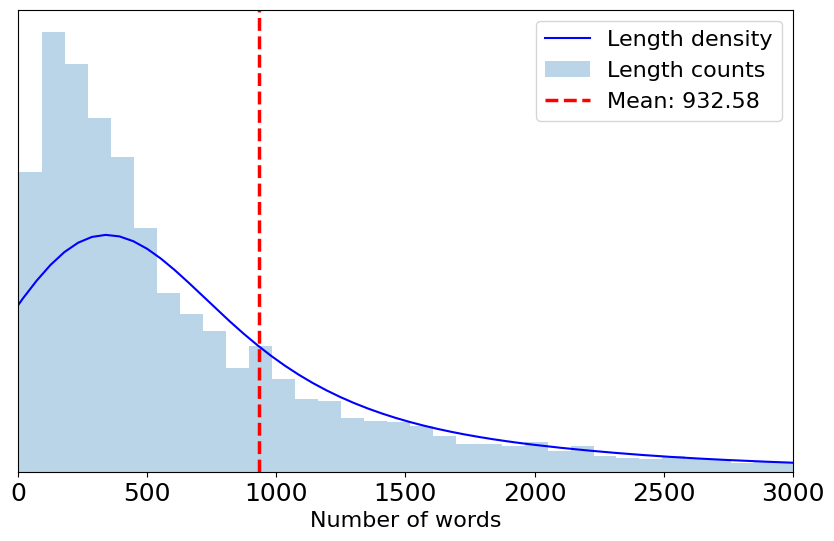

In [19]:

#lenghts of speeches density estimaotr plot
plt.figure(figsize=(10, 6))
filtered_lengths = putins_talks[putins_talks['date'] > '2012-01-01']['length']


mean_len = filtered_lengths.mean()

filtered_lengths.plot(kind='density', color='blue', label='Length density')
filtered_lengths.plot(kind='hist', density=True, bins=300, alpha=0.3, label='Length counts')

plt.axvline(mean_len, color='red', linestyle='--', label=f'Mean: {mean_len:.2f}', linewidth=2.5)
# plt.title('Length of speeches') # Title will be in fig caption
plt.xlabel('Number of words', fontsize=16)
plt.xlim(0, 3000)
plt.xticks(fontsize=18)
plt.gca().get_yaxis().set_visible(False)
plt.legend(fontsize=16)
plt.show()


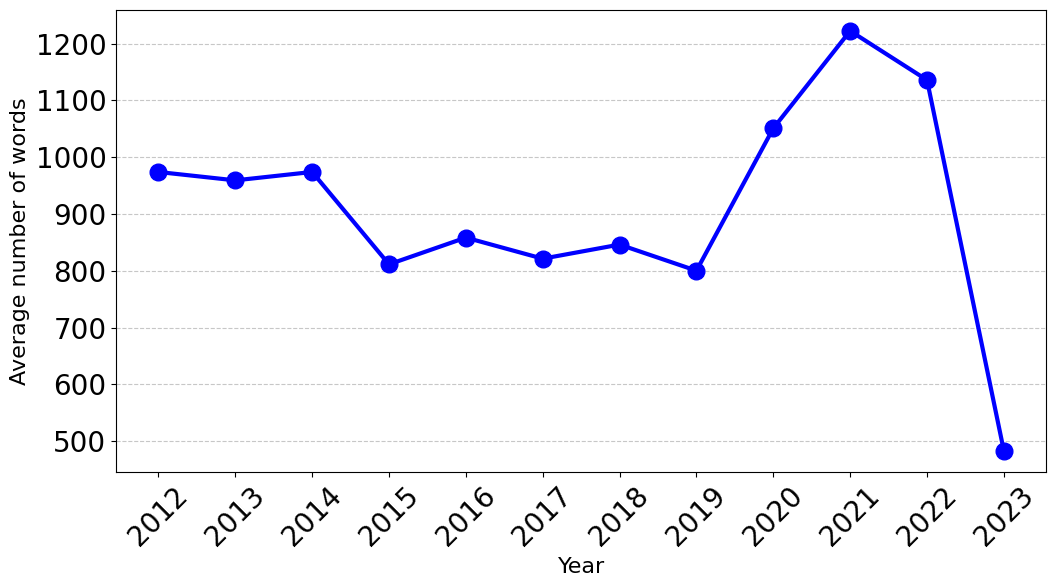

In [ ]:
# Konwersja daty i obliczenie średniej długości przemówień na rok
putins_talks['date'] = pd.to_datetime(putins_talks['date'])
yearly_mean_len = putins_talks.groupby(putins_talks['date'].dt.year)['length'].mean()

# Filtrowanie danych do roku 2022 włącznie
plt.figure(figsize=(12, 6))
yearly_mean_len.plot(kind='line', marker='o', linestyle='-', color='blue', markersize=12, linewidth=3)
# plt.title('Average speech length over the years') # Title will be in fig caption
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average number of words', fontsize=16)
# plt.grid(True, linestyle='--', alpha=0.7)
plt.grid(visible=True, which='major', axis='y', linestyle='--', alpha=0.7)
plt.xticks(yearly_mean_len.index, rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### tags heatmap over time

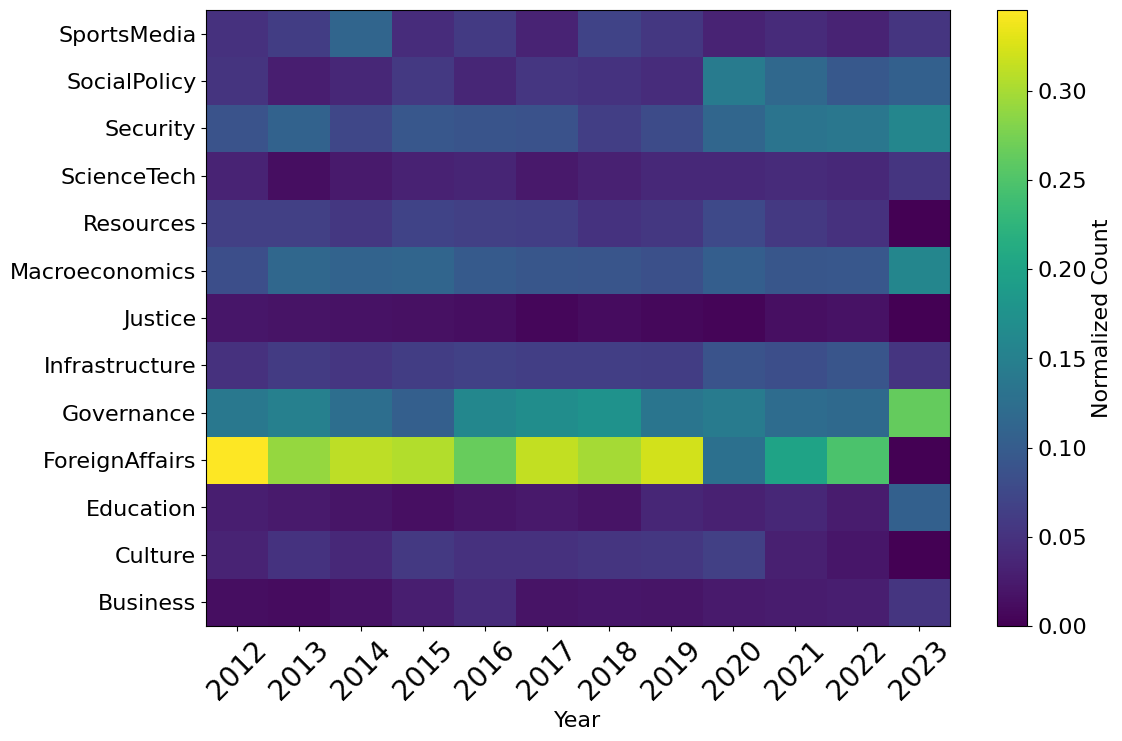

In [42]:
GROUP_RENAME_MAP = {
    'International_Relations_Global_Organizations': 'ForeignAffairs',
    'Macroeconomics_Fiscal_Policy': 'Macroeconomics',
    'Business_Special_Development': 'Business',
    'State_Governance_Public_Service': 'Governance',
    'Security_Defense_Enforcement': 'Security',
    'Justice_Anti-Corruption_Rights': 'Justice',
    'Social_Welfare_Health': 'SocialPolicy',
    'Education_Personnel': 'Education',
    'Infrastructure_Housing_Construction': 'Infrastructure',
    'Natural_Resources_Primary_Industries_Environment': 'Resources',
    'Science_IT_Space': 'ScienceTech',
    'Culture_Identity_History': 'Culture',
    'Sport_Tourism_Media': 'SportsMedia'
}

dates_tags['tags'] = dates_tags['tags'].replace(GROUP_RENAME_MAP)

#make a heatmap of tags over time with normalized counts
heatmap_data = dates_tags.copy()
heatmap_data['year'] = pd.to_datetime(heatmap_data['date']).dt.year
heatmap_data = heatmap_data.groupby(['year', 'tags']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data.T, aspect='auto', cmap='viridis', origin='lower')
cbar = plt.colorbar(label='Normalized Count')
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Normalized Count', fontsize=16)
plt.yticks(range(len(heatmap_data.columns)), heatmap_data.columns, fontsize=16)
plt.xticks(range(len(heatmap_data.index)), heatmap_data.index, rotation=45, fontsize=20)
plt.xlabel('Year', fontsize=16)
# plt.ylabel('Tags', fontsize=16)
# plt.title("Heatmap of Tags Over Time", fontsize=20)
plt.show()